# Using Machine Learning to Predict GDP for Countries in the EU

## Project Description
- We want to view European data and see how it changes over time. We looked at economical trends over time (GDP) and attempted to predict it using a variety of features (that are listed below). We initially were thinking globally, but have narrowed it down to the EU as we found the Eurostat database which has a lot of time series data for a variety of features for countries in the E.U.
## Why is this project personally interesting?
 - The reason why we chose to find features to estimate Europe's GDP is because being able to predict GDP helps with economic planning and investment decision making.
 - This is interesting because this could help with looking at currency strengths and social welfare of people in those countries.

## Our Research Question
 - What features can we use from the the Europa Dataset to predict the EU's GDP?

## Datasource
- [Eurostat](https://ec.europa.eu/eurostat)
  - Eurostat is the statistical office of the E.U.
  - According to the [Eurostat website](https://ec.europa.eu/eurostat/web/main/about-us/who-we-are#:~:text=Eurostat%20produces%20European%20statistics%20in%20partnership%20with%20National%20Statistical%20Institutes%20and%20other%20national%20authorities%20in%20the%20EU%20Member%20States), "Eurostat produces European statistics in partnership with National Statistical Institutes and other national authorities in the EU Member States"
- Overall, this data is obtained through a partnership called the [ESS](https://ec.europa.eu/eurostat/web/european-statistical-system/overview) (European Statistical System)
  - According to [Eurostat](https://ec.europa.eu/eurostat/web/european-statistical-system/overview#:~:text=The%20ESS%20is,of%20European%20statistics.), "The ESS is the partnership between the EU statistical authority, which is the Commission (Eurostat), the 'National Statistical Institutes' (NSIs), and 'Other National Authorities' (ONAs) in each EU country. These are responsible for the development, production, and dissemination of European statistics."

## Observational Unit
- One country in a specific year
- For example, Germany in 2017

## How is the data collected?
- The E.U. doesn't list how they collect their data but on their website that the data is collected "by national statistical authorities in compliance with common EU statistical regulations and standards"
- Each country reports their data to the E.U. and Eurostat hosts some of that data.
- Each feature in our dataset was located in a different table, so found and collected from many different datasets.

## Variables of Interest
- [GDP](https://ec.europa.eu/eurostat/databrowser/product/view/nama_10_gdp) (Quantitative)
  - Unit: Current prices (in million Euros)
  - "Euro series (CP MEUR) are derived from transmitted national currency series using historic exchange rates. They are suitable for internal comparison and aggregation. When comparing them over time, account must be taken of exchange rate effects.
For euro area Member States, the national currency series are converted into euros using the irrevocably fixed exchange rate. This "preserves the same growth rates than for the previous national currency series. Both series coincide for years after accession to the euro area but differ for earlier years due to market exchange rate movements."
  - The quote above describes our unit from the [Eurostat database description](https://ec.europa.eu/eurostat/cache/metadata/en/nama10_esms.htm#unit_measure1678716264336:~:text=Euro%20series%20(CP,exchange%20rate%20movements.). Because we're focusing on EU member states and a fixed exchange rate, we don't need to adjust for exchange rates or inflation.
- [Housing](https://ec.europa.eu/eurostat/databrowser/view/prc_hpi_a/default/table?lang=en) (Quantitative)
  - Unit: Housing Price Index (2015 = 100)
- [Inflation Rate](https://ec.europa.eu/eurostat/databrowser/view/tec00118/default/table?lang=en) (Quantitative)
  - Unit: Consumer Price Index (2015 = 100)
- [Immigration](https://ec.europa.eu/eurostat/databrowser/product/view/tps00176) (Quantitative)
  - Unit: Number of People
- [Emigration](https://ec.europa.eu/eurostat/databrowser/product/view/tps00177) (Quantitative)
  - Unit: Number of People
- [Unemployment](https://ec.europa.eu/eurostat/databrowser/view/tps00203/default/table?lang=en) (Quantitative)
  - Unit: Percentage of the Population Unemployed
- [Population](https://ec.europa.eu/eurostat/databrowser/view/demo_gind__custom_8449795/default/table?lang=en) (Quantitative)
  - Unit: Number of People
- [Quality of Life Satisfaction](https://ec.europa.eu/eurostat/databrowser/view/ilc_pw01__custom_8469540/default/table?lang=en&page=time:2018) (Categorical)
  - Unit: A rating of overall life satisfaction based on factors such as income, poverty, social exclusion and living conditions
  - In order to view the details on how it's collected, an account must be created in [CIRCABC](https://circabc.europa.eu/ui/group/853b48e6-a00f-4d22-87db-c40bafd0161d/library/570fe72e-aa7f-4eff-8f09-3dc140f0359a?p=1&n=10&sort=name_ASC)
- [Exports and Imports](https://ec.europa.eu/eurostat/databrowser/view/tet00002/default/table?lang=en) (Quantitative)
  - Unit: Million Euro

## Data Cleaning
- As mentioned above, almost all of our data was located in different data sets, so we needed to filter out the columns we wanted and merge them together.
  - The values we took from each dataset were the country, the year, and the observed value of the dataset (the above variables of interest)
- Some of these datasets contained information on countries outside of the E.U. (or were previously in the E.U.), so we limited ourselves to E.U. countries consistently in all data sets.
  - These countries are the countries currently in the EU: Austria, Belgium, Slovenia, Sweden, Romania, Portugal,
       Poland, Netherlands, Malta, Latvia, Luxembourg, Lithuania,
       Italy, Ireland, Hungary, Croatia, France, Finland, Spain,
       Estonia, Denmark, Germany, Czechia, Cyprus, Slovakia,
       Bulgaria
- There was limited data before 2011 in most datasets, so our data is valid from 2011 to 2021.
  - One exception is data from Bulgaria in 2011, but because that's the only country with missing data for that year, we decided to keep the remaining 2011 data in our final dataset.
- Dropping NaNs
  - Before 2011, a lot of data contained NaNs, but during and after 2011, for our focused countries, the only datapoint that contained NaNs was Bulgaria in 2011, so we only had to drop one datapoint!
- Log Transforming
  - Nearly all of our quanitative variables were skewed (besides index values and year), so I log transformed them before inputting them into the linear regression model. Our target variable, GDP, was also right skewed, so it's log transformed in the linear regression model.

### Time Series
Our goal in this project is to predict GDP, so we needed to project values into the future. In order to do this, we created a time series projecting values 5 years forward.
- Used Polynomial Features to 1 and Linear Regression to predict what the GDP would look like in the next 5 years
- We used one degree because our data looked linear. By choosing degree 1 and not a higher degree, we minimize overfitting.
- We divided the dataset per country and for each feature, we followed the steps in the Time Series Notebook to create our time series and forecast
- This will be used to test how our data performs compared to the other models that we trained

## Machine Learning and Model Analysis
- Used K-Nearest Neighbors Regressor
- Linear Regressor
- Stacking/Ensemble Regressor

## How We Narrowed Down Hyperparameters and Model of Choice
- In order to find the best model features, we decided to create a power set of all possible combinations of variables to see which would work best (results listed below for each model). The features from the model with the lowest MSE were chosen.
- For KNN, I used a GridSearch between 1 and 20 to find the best value of K.
- Afterwards, we combined the best of each for regressor that combined model


### K-Nearest Neighbors
From the power set, the best features were: ['geo', 'Year', 'Population', 'Imports']

From the Grid Search with these features, the best k value was 8.


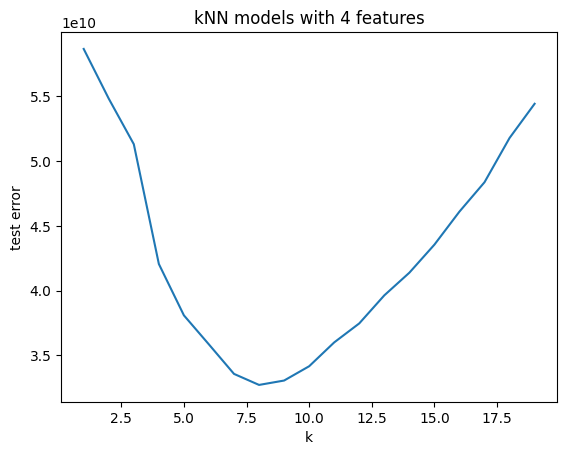

### Linear Regression
I created 3 different models for linear regression, each having different features and y's. <br>


#### Linear Regression - Log Transformed X and y
In order to perform effective linear regression, we need to attempt to make our data normally distributed. A lot of our data was right-skewed, so I log transformed all of the quantitative data except for Year, CPI, and Housing Price Index.

In the figure below, you can see that GDP is extremely right-skewed:
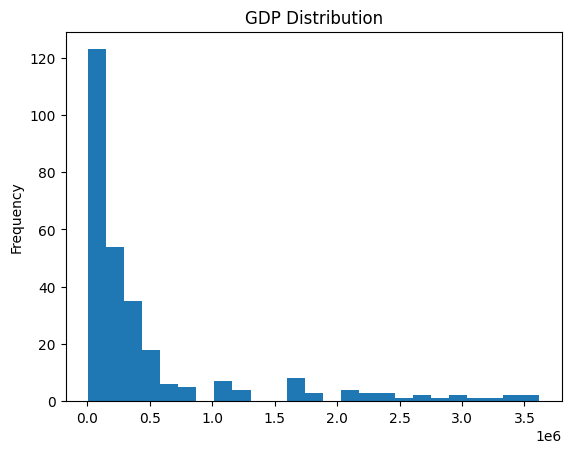

This figure shows the log transformed GDP:

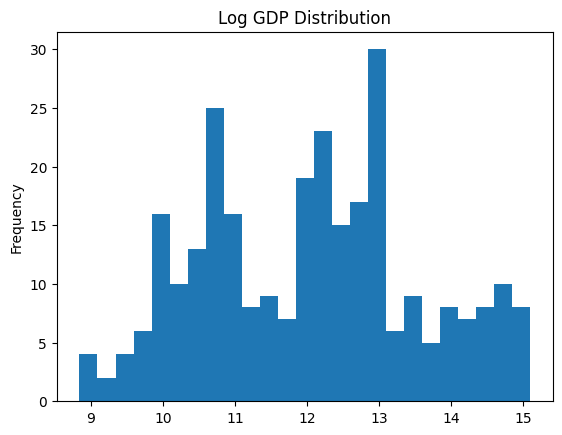

Similar distributions are apparent for the other mentioned quantitative variables (see Visualization notebook)

After transforming, the best features were found to be: ['Year', 'CPI', 'log(Immigrants)', 'log(Population)', 'log(Unemployment)', 'log(Deaths)', 'log(Exports)']

#### Linear Regression - Per Capita Model
In this model, the target variable was GDP per capita. I was interested in seeing what the results would be with this metric instead.

Variables that were able to be converted to a per capita metric were (Immigrants, Emigrants, Deaths, Exports, and Imports). Population was also log transformed to be more normally distributed.

The best features from this model were found to be: ['geo', 'Immigrants_pcap', 'Imports_pcap']

#### Linear Regression - No Transformations
The final linear regression model I created involved no transformations. I created this model mainly to be able to apply a linear regression model to an ensemble model with KNN. (The other linear regression models have different units for the target variable)

The best features from this model were: ['geo', 'Immigrants', 'emigration', 'total_deaths', 'Imports']

### Ensemble Regressor (Stacking)

The final model was created by combining the KNN model and the untransformed Linear Regression model (as they both predicted the same target variable, untransformed GDP).

In order to create this ensemble regressor, I used the Stacking Regressor.

## Results


### KNN Model

- KNN - Base Model
  - Test RMSE: 124842.114
  - Cross Val RMSE: 101692.214
  - Test R^2: 0.9711
  - Benchmarks:
    - Cross Val: 690927.333
    - Standard Deviation: 867121.615
- KNN - Predicting for 2021
  - Test RMSE: 145482.642
  - Cross Val RMSE: 150882.371
  - Test R^2: 0.970
  - Benchmarks:
    - Cross Val (Mean): 659915.707
    - Standard Deviation: 860533.848

### Linear Regression Models

- Linear - Log Transforms
  - Test RMSE: 0.2739277626249072
  - Cross Val RMSE: 0.2752669104287434
  - Test R^2: 0.9711439844190322
  - Benchmarks:
    - Cross Val (Mean): 1.4660836855778345
    - Standard Deviation: 1.6236166560977188
  
- Linear - Log Transforms Predicting 2021
  - Test RMSE: 0.26376247487392557
  - Cross Val RMSE: 0.32017677586391696
  - Test R^2: 0.9672226359601809
  - Benchmarks:
    - Cross Val (Mean): 1.491461500108686
    - Standard Deviation: 1.4786496693288973
  <br>

- Linear - Per Capita Model
  - Test RMSE: 2256.046
  - Cross Val RMSE: 3700.357
  - Test R^2: 0.984
  - Benchmarks:
    - Cross Val (Mean): 19659.644
    - Standard Deviation: 18090.662

- Linear - No Transformation
  - Test RMSE: 42190.426
  - Cross Val RMSE: 38021.174
  - Benchmarks:
    - Cross Val (Mean): 690927.333
    - Standard Deviation: 867121.615
- Linear - No Transformation Predicting 2021
  - Test RMSE: 75970.98
  - Cross Val RMSE: 129483.09
  - Benchmarks:
    - Cross Val (Mean): 659915.707
    - Standard Deviation: 860533.848



Out of all these linear models, I would say that the model that appropriately transforms variables is the best. It has a lower RMSE Test Rate than training rate interestingly and has similar results to the model predicting across all years.

### Ensemble Model

- Ensemble
  - Test RMSE: 42305.281
  - Cross Val RMSE: 39914.055
  - Test R^2: 0.997586400245855
  - Benchmarks:
    - Cross Val (Mean): 690927.333
    - Standard Deviation: 867121.615
  
- Ensemble - Predicting 2021
  - Test RMSE: 85751.335
  - Cross Val RMSE: 183450.029
  - Test R^2: 0.98968
  - Benchmarks:
    - Cross Val (Mean): 659915.707
    - Standard Deviation: 860533.848
  <br>

This ensemble model provides a result between the non-transformed linear regression model and KNN. Its Test RMSE is comparable to the linear regression model, but it's worse at predicting the future 2021 values. So far, it still seems like the transformed linear model is the best model when predicting new, future data.

I'm ignoring R^2 values because all of them appear to be extremely high. This is likely because this data consists of a time series.

### Time Series Comparison

Because we want to compare in the future, I compared our "best" model to our time series predictions (2022 - 2027). Of course these aren't representative of real values, but they were interesting to compare.

  - Test RMSE: 0.2514
  - Cross Val RMSE: 0.3133
  - Test R^2: 0.9696
  - Benchmarks:
    - Cross Val (Mean): 1.485843915942742
    - Standard Deviation: 1.444108715440894

These results are similar to the 2021 predictions, so this may be the best model for projection (or is just very similar to the time series projection)



## How we would improve this model
I would:
- Put more research into models that are effective for time series data. Our R^2 values were likely very high due to being a time series dataset.
- Find another data set that contains a wider range of time series data. Instead of only predicting for 2021, if we had data that went 50 years back, we could create a model to predict for the final 5 or 10 years instead of 1.
- Find effective metrics to measure the accuracy of time series predictions.